In [1]:
import sys
import os
sys.path.append(sys.path[0].replace('/notebooks',''))

In [2]:
from utils import get_images_labels
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose

In [3]:
df = get_images_labels("/home/lumalfa/datasets/DigiFace-1M/",format_img='png')

Images and labels loaded


map_labels = {j:i for i,j in enumerate(df['images_labels'].unique())}
df['images_labels'] = df['images_labels'].apply(lambda x: map_labels[x])

In [4]:
train, aux = train_test_split(df,test_size=0.3,random_state=69,stratify=df['images_labels'])
val, test = train_test_split(aux,test_size=0.5,random_state=69,stratify=aux['images_labels'])

In [5]:
from dataset import DatasetGeneral

from torchvision.transforms import (CenterCrop, Compose, Normalize, Resize,
                                    ToTensor)

from torch.utils.data import DataLoader
from tqdm import tqdm

In [6]:
workers = 0
batch_size = 2

transform = Compose([
        Resize(256),
        CenterCrop(224),
        ToTensor(),
        Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
    ])

print("------- Starting dataloaders -------")

train_dataset   = DatasetGeneral(train['images_paths'].tolist(), train['images_labels'].tolist(), transform_data=None,pos_neg_examples=4)
val_dataset     = DatasetGeneral(val['images_paths'].tolist(), val['images_labels'].tolist(), transform_data=transform,pos_neg_examples=4)
test_dataset    = DatasetGeneral(test['images_paths'].tolist(), test['images_labels'].tolist(), transform_data=transform,pos_neg_examples=4)

train_dataloader = DataLoader(train_dataset, num_workers=workers, batch_size=batch_size)
val_dataloader = DataLoader(val_dataset, num_workers=workers, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, num_workers=workers, batch_size=batch_size)

------- Starting dataloaders -------


In [10]:
anchor, positive, negative = train_dataset.__getitem__(0)

RuntimeError: Could not infer dtype of Image

In [9]:
anchor.shape

torch.Size([3, 224, 224])

In [16]:
import torch

In [17]:
torch.tensor(positive)

RuntimeError: Could not infer dtype of Image

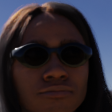

In [13]:
anchor

In [11]:
for anchor, positive, negative in tqdm(val_dataloader,total=train_dataloader.__len__()):
    break

  0%|                                                                                         | 0/50400 [00:00<?, ?it/s]


In [13]:
positive.shape

torch.Size([2, 4, 3, 224, 224])

In [29]:
negative

[<PIL.Image.Image image mode=RGB size=112x112>,
 <PIL.Image.Image image mode=RGB size=112x112>,
 <PIL.Image.Image image mode=RGB size=112x112>,
 <PIL.Image.Image image mode=RGB size=112x112>]

In [28]:
len(negative)

4

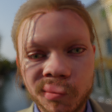

In [22]:
negative[0]

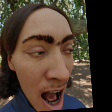

In [21]:
positive[0]

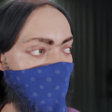

In [19]:
anchor